# Sensitive data breach

This hypothetical scenario analyzes the risk associated with a malicious external actor gaining access to a sensitive database and using ransomware to halt operations and extort the organization by threatening to expose stolen data publicly.

| Threat            | Threat type | Method category | Asset                                | Loss effect             |
|-------------------|-------------|-----------------|--------------------------------------|-------------------------|
| External actor(s) | Malicious   | Ransomware      | Database containing PII and PCI data | Loss of confidentiality |

In [5]:
from pyfair import FairModel

model = FairModel(name='Sensitive data breach', n_simulations=10_000)

# Threat Event Frequency
# 2 to 4 times per year, based on the current contact frequency, phishing and spam attempts and controls in place.

model.input_data('Threat Event Frequency', low=2, mode=3, high=4)

# Vulnerability
# 5% to 15%, based on the strength of security controls and threat actor capability. The assumption is the controls are strong against this specific type of threat.

model.input_data('Vulnerability', low=.05, mode=.1, high=.15)

# Direct loss
# Response time to manage the event - Person hours - 50 to 150 hours, based on the size of the loss
# Employee wages based on skill level needed to repair and restore - $75 to $150 per hour, based on skill level required for specific response

model.input_data('Primary Loss', low=50 * 75, mode=100 * 125, high=150 * 150)

# Secondary loss to customers
# 500,000 to 1M, estimated database of sensitive records
# 75 to 100% PII/PCI, estimated percentage that contain PCI or PII
# 10 to 25% IP, estimated percentage that contain IP

model.input_multi_data('Secondary Loss', {
    'Lost business': {
        'Secondary Loss Event Frequency': {'low': .05, 'mode': .1, 'high': .5},
        'Secondary Loss Event Magnitude': {'low': 0, 'mode': 7_000_000, 'high': 10_500_000},
    },
    'Fines': {
        'Secondary Loss Event Frequency': {'low': .05, 'mode': .1, 'high': .5},
        'Secondary Loss Event Magnitude': {'low': 0, 'mode': 5_000_000, 'high': 10_000_000},
    }
})

model.calculate_all()

Author,dereklio
Created,2022-01-15 22:55:10
PyFair Version,0.1-alpha.12
Type,FairSimpleReport
,Sensitive data breach
Mean,"$9,683,249,321,778"
Stdev,"$4,752,135,373,892"
Minimum,"$469,078,497,962"
Maximum,"$35,470,947,750,837"
Simulations,"10,000"
Identifier,fdad572c-75f9-11ec-8782-a8667f05a809


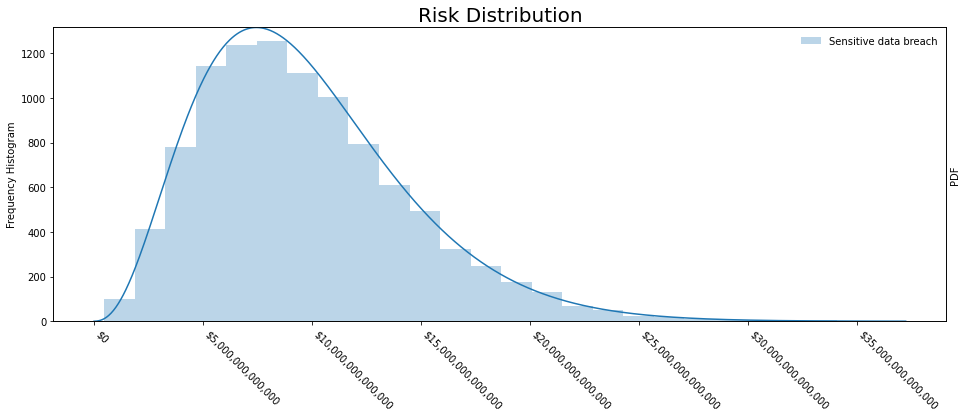

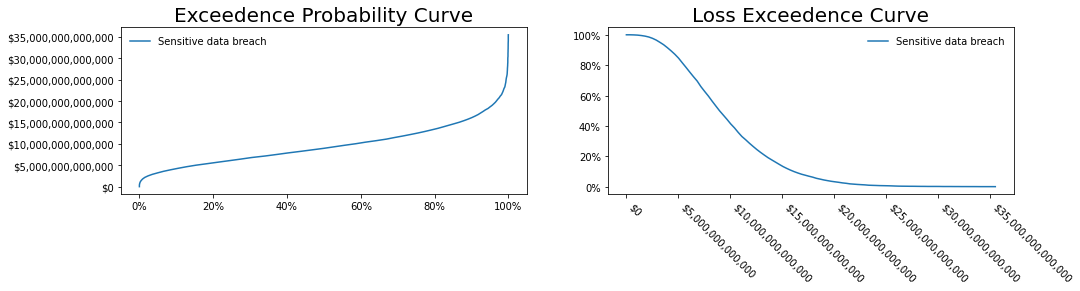

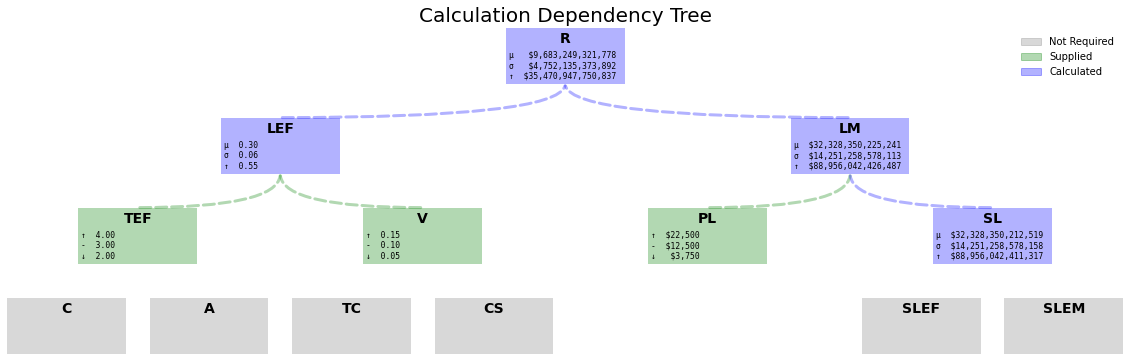

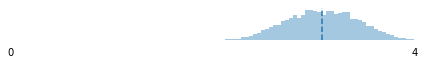

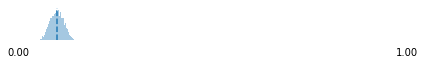

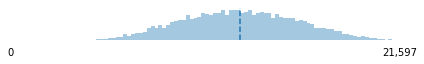

In [6]:
from pyfair import FairSimpleReport
from IPython.display import HTML
import tempfile

temp_dir = tempfile.mkdtemp()
fsr = FairSimpleReport(model)
fsr.to_html(temp_dir + '/report.html')
HTML(filename=temp_dir + '/report.html')